<h1>Лабораторная работа №1</h1>
<ul>
    <li><strong>Группа:</strong> ИУ10-36</li>
    <li><strong>Студент:</strong> Игревский Валентин Владимирович</li>
    <li><strong>Вариант:</strong> 6</li>
</ul>

<h3>Необходимые библиотеки</h3>

In [2]:
import random
import numpy as np
import functools
import timeit
import typing
import matplotlib.pyplot as plt

<h3>Самописные функции</h3>

In [14]:
def create_vector(n: int) -> list[int]:
    return [random.randint(0, 100) for _ in range(n)]


def TZ12(vec: list[int]) -> int:
    return sum(vec)


def TZ13(vec: list[int]) -> int:
    return np.prod(vec)


def TZ14(vec: list[int], x: float = 14 * 1.5) -> float:
    result = 0
    for i in range(len(vec), 0, -1):
        result = result * x + vec[i - 1]
    return result


def TZ16(vec: list[int]) -> int:
    result = vec[0]
    for coordinate in vec[1:]:
        if coordinate < result:
            result = coordinate
    return result

def create_matrix(n: int) -> list[list[int]]:
    result = [[random.randint(0, 100) for j in range(n)] for i in range(n)]
    return result

def multiply_matrix_v1(A: list[list[int]], B: list[list[int]], n) -> list[list[int]]:
    result = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k]*B[k][j]
    return result

def multiply_matrix_v2(A: np.array, B: np.array) -> np.ndarray:
    return np.dot(A, B)

<h3>Декоратор</h3>

In [4]:
# %load -y -n -s get_usage_time usage_time.py
def get_usage_time(*, number: int = 1, setup: str = 'pass', ndigits: int = 3) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator

<h3>Общие параметры</h3>

In [5]:
N = 20 - 6
iter_count = 5
count = range(1, 10 ** 5 * N, 100 * N)

<h3>Сумма элементов</h3>
<p>TZ12$(v) = \sum\limits_{k=1}^{n} {v_k}$</p>

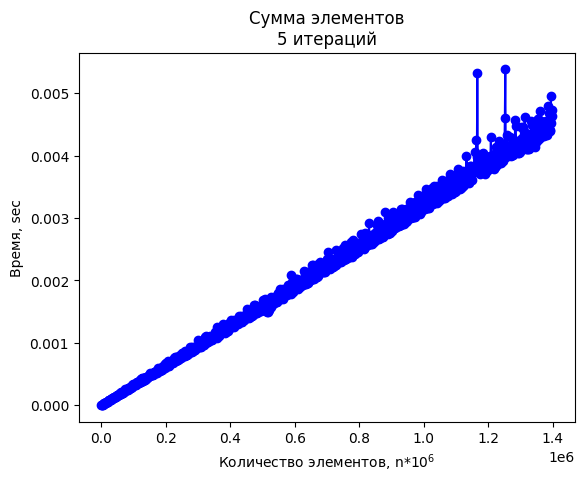

In [16]:
vector = create_vector(10 ** 5 * N)
func = get_usage_time(ndigits=5, number=iter_count)(TZ12)
times = [func(vector[:i]) for i in count]

fig = plt.plot(count, times, 'bo-')
plt.title(f'Сумма элементов\n{iter_count} итераций')
ax = plt.gca()
ax.set_xlabel('Количество элементов, n*$10^6$')
ax.set_ylabel('Время, sec')
plt.show()

<h3>Произведение элементов</h3>
<p>TZ13$(v) = \prod\limits_{k=1}^{n} {v_k}$</p>

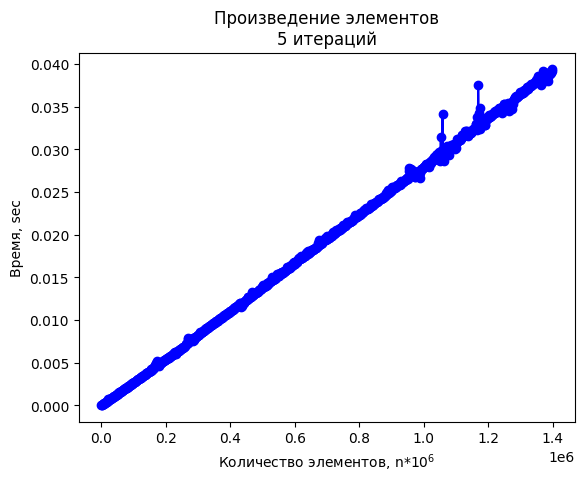

In [17]:
vector = create_vector(10 ** 5 * N)
func = get_usage_time(ndigits=5, number=iter_count)(TZ13)
times = [func(vector[:i]) for i in count]

fig = plt.plot(count, times, 'bo-')
plt.title(f'Произведение элементов\n{iter_count} итераций')
ax = plt.gca()
ax.set_xlabel('Количество элементов, n*$10^6$')
ax.set_ylabel('Время, sec')
plt.show()

<h3>Вычисление полинома методом Горнера</h3>
<p>TZ14$(v) = v_1 + x (v_2 + x(v_3+ \ldots))$</p>

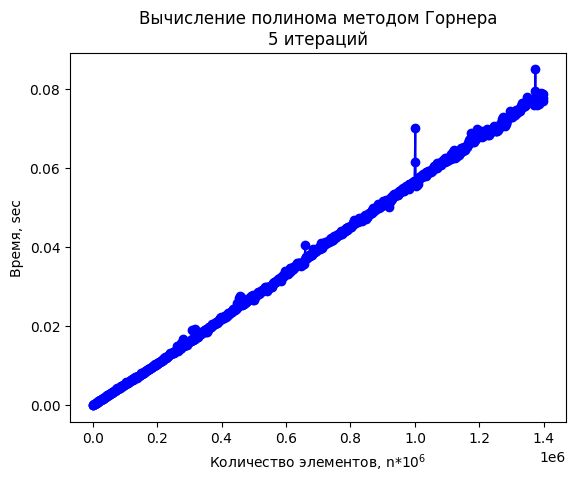

In [19]:
vector = create_vector(10 ** 5 * N)
func = get_usage_time(ndigits=5, number=iter_count)(TZ14)
times = [func(vector[:i]) for i in count]

fig = plt.plot(count, times, 'bo-')
plt.title(f'Вычисление полинома методом Горнера\n{iter_count} итераций')
ax = plt.gca()
ax.set_xlabel('Количество элементов, n*$10^6$')
ax.set_ylabel('Время, sec')
plt.show()

<h3>Поиск минимума простым перебором</h3>
<p>TZ16$(v) = \min(v)$</p>

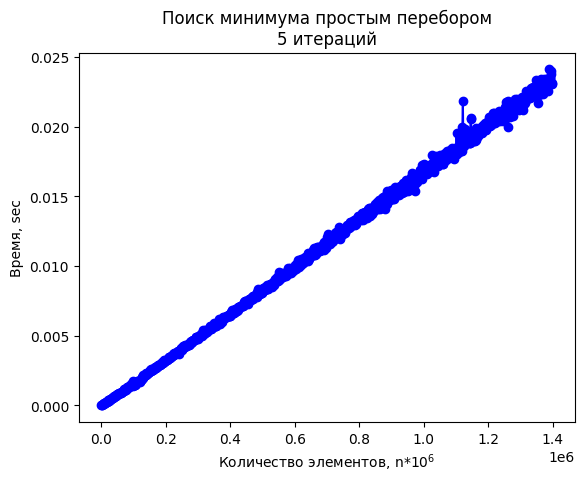

In [20]:
vector = create_vector(10 ** 5 * N)
func = get_usage_time(ndigits=5, number=iter_count)(TZ16)
times = [func(vector[:i]) for i in count]

fig = plt.plot(count, times, 'bo-')
plt.title(f'Поиск минимума простым перебором\n{iter_count} итераций')
ax = plt.gca()
ax.set_xlabel('Количество элементов, n*$10^6$')
ax.set_ylabel('Время, sec')
plt.show()

<h3>Произведение матриц</h3>
Для создания далее представленного графика используется функция dot() библиотеки numpy.

Самописный алгоритм перемножения матриц описан в функии multiply_matrix_v1, однако даже не маленьком количестве элементов в матрице функция выполняется крайне долго, что затрудняет создание графика.

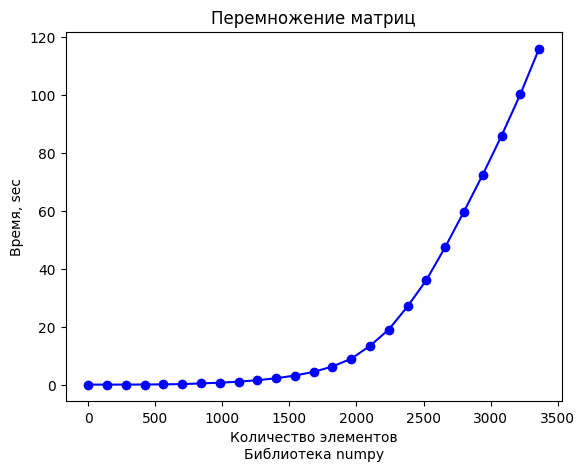

In [9]:
count = range(1, 250 * N, 10 * N)
A = np.array(create_matrix(250*N))
B = np.array(create_matrix(250*N))
func = get_usage_time(ndigits=5)(multiply_matrix_v2)
times = [func(A[:i, :i], B[:i, :i]) for i in count]

fig = plt.plot(count, times, 'bo-')
plt.title('Перемножение матриц')
ax = plt.gca()
ax.set_xlabel('Количество элементов\nБиблиотека numpy')
ax.set_ylabel('Время, sec')
plt.show()